In [16]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Explore data

In [2]:
df = pd.read_csv('/Users/jackcook/Documents/Course notes/Data Sources/3.12. Example.csv')

In [3]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [4]:
df.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


Loyalty has already been standardised!

## Plot data

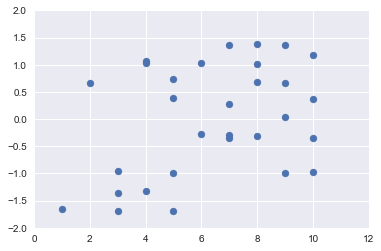

In [5]:
plt.scatter(df.Satisfaction, df.Loyalty)
plt.xlim(0,12)
plt.ylim(-2,2)
plt.show()

## Select features

In [6]:
x = df.copy()

## Clustering

In [7]:
kmeans = KMeans(2) # 3 clusters

In [8]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Results

In [9]:
identified_clusters = kmeans.fit_predict(x) # Return clusters
identified_clusters

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [10]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.describe()

,Satisfaction,Loyalty,Cluster
count,30.000000,30.000000,30.000000
mean,6.400000,0.001000,0.433333
std,2.620871,1.016476,0.504007
min,1.000000,-1.690000,0.000000
25%,4.250000,-0.967500,0.000000
50%,7.000000,0.150000,0.000000
75%,8.750000,0.947500,1.000000
max,10.000000,1.380000,1.000000


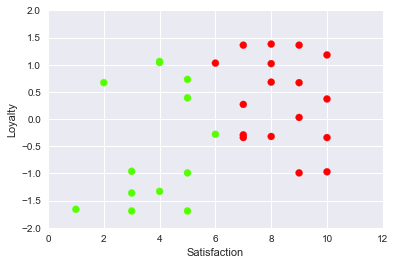

In [14]:
plt.scatter(data_with_clusters.Satisfaction, 
            data_with_clusters.Loyalty, 
            c=data_with_clusters['Cluster'], 
            cmap = 'prism')
plt.xlabel(data_with_clusters.Satisfaction.name)
plt.ylabel(data_with_clusters.Loyalty.name)
plt.xlim(0,12)
plt.ylim(-2,2)
plt.show()

As we did not standardise satisfaction, it was used almost solely as the basis for clustering (hence the near vertical line split at satisfaction = 6

## Standardising variables

In [18]:
x_scaled = preprocessing.scale(x) # Scales each variable separately
df_scaled = pd.DataFrame(columns = {'Satisfaction','Loyalty'}, data = x_scaled)
df_scaled.describe()

,Loyalty,Satisfaction
count,3.000000e+01,3.000000e+01
mean,-1.036208e-16,-4.810966e-17
std,1.017095e+00,1.017095e+00
min,-2.095606e+00,-1.692030e+00
25%,-8.343618e-01,-9.690902e-01
50%,2.328452e-01,1.490908e-01
75%,9.119769e-01,9.470768e-01
max,1.397071e+00,1.379840e+00


## Selecting n clusters

We want to pick a minimum number of clusters where adding additional clusters doesn't significantly decrease the Within Cluster Sum of Squares (WCSS - distance from centroid). 

The WCSS is returned from KMeans.inertia_

In [30]:
wcss = []

for i in range(10):
    kmeans = KMeans(i+1)
    kmeans.fit(x_scaled)
    wcss.append([i+1, kmeans.inertia_])

df_cluster_selection = pd.DataFrame(columns=['Number of clusters','WCSS'], data=wcss)
df_cluster_selection

,Number of clusters,WCSS
0,1,60.000000
1,2,29.818973
2,3,17.913350
3,4,10.247182
4,5,7.792695
5,6,6.569489
6,7,5.460205
7,8,4.315662
8,9,3.877188
9,10,3.157665


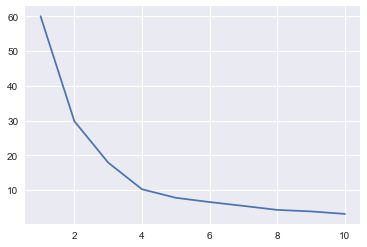

In [31]:
plt.plot(df_cluster_selection['Number of clusters'],df_cluster_selection['WCSS'])
plt.show()

## Reclustering with standardised variables

In [45]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy() # Take original dataset
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled) # Add clusters from standardised dataset!
clusters_new.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1


Data is original, but clusters are based on standardised data!!

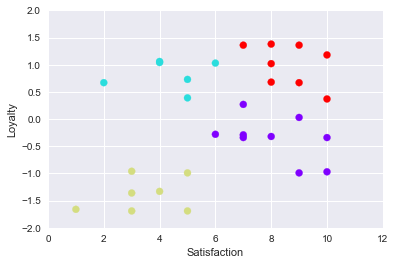

In [52]:
plt.scatter(clusters_new.Satisfaction, 
            clusters_new.Loyalty, 
            c=clusters_new['cluster_pred'], 
            cmap = 'rainbow')
plt.xlabel(clusters_new.Satisfaction.name)
plt.ylabel(clusters_new.Loyalty.name)
plt.xlim(0,12)
plt.ylim(-2,2)
plt.show()